# Digit Recognizer
<html>
    <body>
<p><t>There are 2 files. They are <li>train.csv</li> <li>test.csv</li> <p>which are used for training and testing respectively. <br>Each row in dataset contain <b>28 x 28 gray-scale image</b> of hand-drawn digit flattened as <b>784 pixels</b>.This pixel values from 0 to 255. These number are from <b>zero to nine</b> indicated by "label" column in train dataset.</p>
<p> This kernel consists of 4 sections<p>
    <ol>
        <li> Data Analysis</li>
        <li> Data preprocessing</li>
        <li> Training</li>
        <li> Testing</li>
    </ol>
<p>Dataset consists of <ul><li>Train data 42,000 rows</li> <li>Test data 28,000 rows</li></ul>

The train dataset is divided into training (90%) and development (10%) datasets.

This data is training on LeNet-5 model which have 2 Convolution layers and 3 fully connected layers published this <a href = "http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf"> paper</a> by Yann LeCun 1998 who received Turning award in 2019.<br><br>
<b>Applied a trick to make Lenet architecture comfortable with these data dimensions. Let's see what is that!
    </body>
</html>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, BatchNormalization, AveragePooling2D, Flatten
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

random_seed = 1
np.random.seed(random_seed)

Using TensorFlow backend.


# Data Analysis

In [3]:
# loading training data
train = pd.read_csv('../input/train.csv')
train.shape

(42000, 785)

In [4]:
# loading test data
test = pd.read_csv('../input/test.csv')
test.shape

(28000, 784)

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
# Dividing Independent and Dependent features in dataset
Y = train["label"].values
X = train.drop(["label"],axis=1).values

In [8]:
# Dimensions of each example (a gray image with 28 x 28 is flattern into 784)
X[0].shape

(784,)

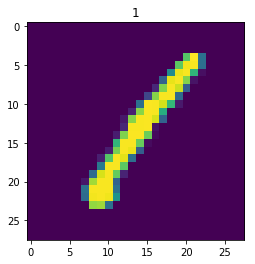

In [9]:
# Visualizing first example in dataset
plt.imshow(np.reshape(X[0],(28,28)))
plt.title(Y[0])
plt.show()

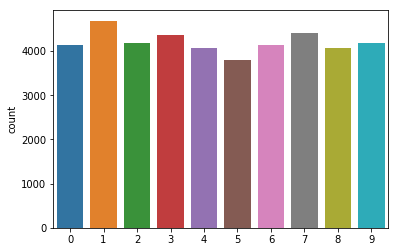

In [10]:
# Plotting count of each digit
sns.countplot(Y)

In [11]:
# Count of each digit
train["label"].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [12]:
# Checking null values
train.isnull().sum().sum()

0

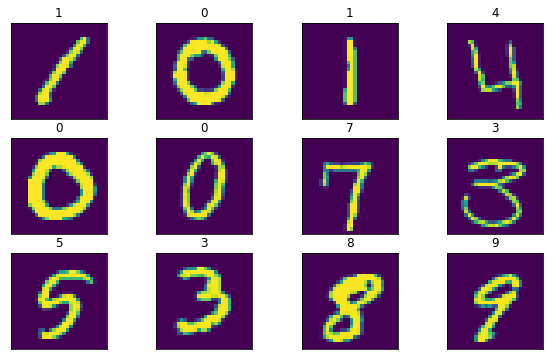

In [13]:
# Plotting grid of first 12 examples
plt.figure(figsize=(10,6))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X[i],(28,28)))
    plt.title(Y[i])
 
plt.show()

# Data preprocessing

In [14]:
# Normalizing pixel values from (0 to 255) to (0 to 1)
X = X/255
test /= 255
#Y is digit label, No need of normalization and Test data do not have labels.

In [15]:
# Checking normalized values
print(X.max(), X.min())

1.0 0.0


In [16]:
# Reshaping images
X = X.reshape(-1,28,28,1)  # training examples
test = test.values.reshape(-1,28,28,1) #test examples

In [17]:
# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y = to_categorical(Y, num_classes = 10)

In [18]:
# Spliting into Train dataset and Validating(development dataset)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.1, random_state=random_seed)

In [19]:
# Checking shape of train data
X_train.shape

(37800, 28, 28, 1)

### Now data is ready to train, Let's design our model

In [20]:
# Defining LeNet model
def lenet5():
    model = Sequential()
    model.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1),padding='same', activation='relu', name='Conv2D0', input_shape=(28,28,1)))
    model.add(BatchNormalization(axis=-1, name='bn0'))
    model.add(AveragePooling2D())
    
    model.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='relu', name='Conv2D1'))
    model.add(BatchNormalization(axis=-1, name='bn1'))
    model.add(AveragePooling2D())
    
    model.add(Flatten())
    model.add(Dense(units=120, activation='relu'))
    model.add(Dense(units=84, activation='relu'))
    model.add(Dense(units=10, activation='softmax'))
    return model

In [21]:
# Initializing lenet model and its data flow
model = lenet5()
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D0 (Conv2D)             (None, 28, 28, 6)         156       
_________________________________________________________________
bn0 (BatchNormalization)     (None, 28, 28, 6)         24        
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
Conv2D1 (Conv2D)             (None, 10, 10, 16)        2416      
_________________________________________________________________
bn1 (BatchNormalization)     (None, 10, 10, 16)        64        
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flat

# Train our model

In [22]:
# Compiling our model and training on train data
model.compile(optimizer='Adam',loss='categorical_crossentropy', metrics=["accuracy"])
histroy = model.fit(X_train, Y_train, epochs=5, batch_size=16)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
37800/37800 [==============================] - 43s 1ms/step - loss: 0.1325 - acc: 0.9584
Epoch 2/5
37800/37800 [==============================] - 43s 1ms/step - loss: 0.0563 - acc: 0.9831
Epoch 3/5
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0422 - acc: 0.9875
Epoch 4/5
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0310 - acc: 0.9906
Epoch 5/5
37800/37800 [==============================] - 42s 1ms/step - loss: 0.0255 - acc: 0.9921


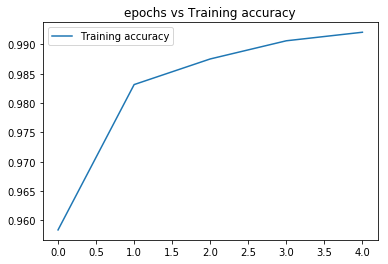

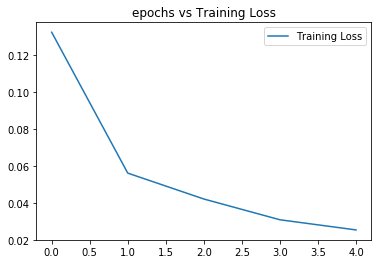

In [23]:
# Plotting Training accuracy and Training Loss curves
train_accuracy = histroy.history['acc']
train_loss = histroy.history['loss']

iterations = range(len(train_accuracy))
plt.plot(iterations, train_accuracy, label='Training accuracy')
plt.title('epochs vs Training accuracy')
plt.legend()

plt.figure()
plt.plot(iterations, train_loss, label='Training Loss')
plt.title('epochs vs Training Loss')
plt.legend()

# Testing our model

In [24]:
# Evaluating our model with dev dataset
preds = model.evaluate(x=X_val, y=Y_val)

print ("\nLoss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

4200/4200 [==============================] - 1s 337us/step

Loss = 0.0469710429965718
Test Accuracy = 0.9864285714285714


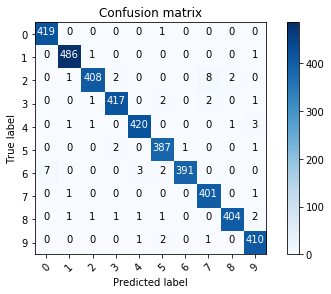

In [25]:
# Look at confusion matrix 

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10)) 

In [26]:
model.save("DigiModel.h5")

In [27]:
# Predicting on Test data
y_pred = model.predict(test)


In [28]:
# Checking sample submission format
sam_sub = pd.read_csv('../input/sample_submission.csv')
sam_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [29]:
# Compressing prediction to labels (ex :  [0,0,1,0,0,0,0,0,0,0] -> 2)
y_pred =  np.argmax(y_pred,axis = 1)


In [30]:

# Making our predictions as Pandas Series 
y_pred = pd.Series(y_pred,name="Label")
y_pred.shape

(28000,)

In [31]:
# Saving our model prediction of test data
# step 1 -> Create a DataFrame with ImageId(given in test data) and Label (Model predicted value)
# step 2 -> Save that DataFrame to make submission in kaggle competition for evaluation
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),y_pred],axis = 1)

submission.to_csv("lenet5_mnist.csv",index=False)

# Conclusion:
1. Applied a Same convolution in First layer because given image size is 28 x 28 where Lenet designed for 32 x 32 input size.
2. Trained 5 epochs with 16 batch size
3. Achieved 98% accuracy